In [3]:
# Importar as bibliotecas necessárias
import pandas as pd
import ssl

# Desativar a verificação do certificado SSL
ssl._create_default_https_context = ssl._create_unverified_context

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Mostrar as primeiras linhas do dataset para confirmar o carregamento
vinhos.head()


,classe,alcool,acido_malico,cinzas,alcalinidade_de_cinzas,magnesio,fenois_totais,flavanoides,fenois_nao_flavanoides,proantocianinas,intensidade_de_cor,matiz,od280_od315_de_vinhos_diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Carregar os dados
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Separar features (X) e rótulos (y)
X = vinhos.iloc[:, 1:]  # Todas as colunas exceto 'classe'
y = vinhos['classe']    # Apenas a coluna 'classe'

# Dividir os dados em treino e teste com random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar as dimensões dos dados
print(f"Dados de treino: {X_train.shape}, Dados de teste: {X_test.shape}")

Dados de treino: (124, 13), Dados de teste: (54, 13)


In [6]:
# Treinar o KNN com k=3
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_train, y_train)
y_pred_k3 = knn_k3.predict(X_test)

# Avaliar o modelo com k=3
accuracy_k3 = accuracy_score(y_test, y_pred_k3)
print(f"Acurácia com k=3: {accuracy_k3:.4f}")

# Treinar o KNN com k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)

# Avaliar o modelo com k=5
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Acurácia com k=5: {accuracy_k5:.4f}")


Acurácia com k=3: 0.7407
Acurácia com k=5: 0.7407


In [7]:
# Treinar o KNN com k=3
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_train, y_train)
y_pred_k3 = knn_k3.predict(X_test)

# Avaliar o modelo com k=3
accuracy_k3 = accuracy_score(y_test, y_pred_k3)
print(f"Acurácia com k=3: {accuracy_k3:.4f}")

# Treinar o KNN com k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)

# Avaliar o modelo com k=5
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Acurácia com k=5: {accuracy_k5:.4f}")


Acurácia com k=3: 0.7407
Acurácia com k=5: 0.7407


In [8]:
def avaliar_knn(random_state):
    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # KNN com k=3
    knn_k3 = KNeighborsClassifier(n_neighbors=3)
    knn_k3.fit(X_train, y_train)
    accuracy_k3 = accuracy_score(y_test, knn_k3.predict(X_test))

    # KNN com k=5
    knn_k5 = KNeighborsClassifier(n_neighbors=5)
    knn_k5.fit(X_train, y_train)
    accuracy_k5 = accuracy_score(y_test, knn_k5.predict(X_test))

    print(f"Random State: {random_state}")
    print(f"Acurácia com k=3: {accuracy_k3:.4f}")
    print(f"Acurácia com k=5: {accuracy_k5:.4f}")
    print("-" * 30)

# Testar com diferentes random_state
avaliar_knn(42)
avaliar_knn(17)
avaliar_knn(24)


Random State: 42
Acurácia com k=3: 0.7407
Acurácia com k=5: 0.7407
------------------------------
Random State: 17
Acurácia com k=3: 0.6481
Acurácia com k=5: 0.6667
------------------------------
Random State: 24
Acurácia com k=3: 0.7407
Acurácia com k=5: 0.6667
------------------------------


In [9]:
# Análise comparativa
print("Análise Comparativa:")
print("Com random_state=42, k=3 foi melhor ou igual a k=5, com acurácia ...")
print("Com random_state=17, k=5 foi superior, indicando que ...")
print("Com random_state=24, ambos foram equilibrados, sugerindo ...")


Análise Comparativa:
Com random_state=42, k=3 foi melhor ou igual a k=5, com acurácia ...
Com random_state=17, k=5 foi superior, indicando que ...
Com random_state=24, ambos foram equilibrados, sugerindo ...


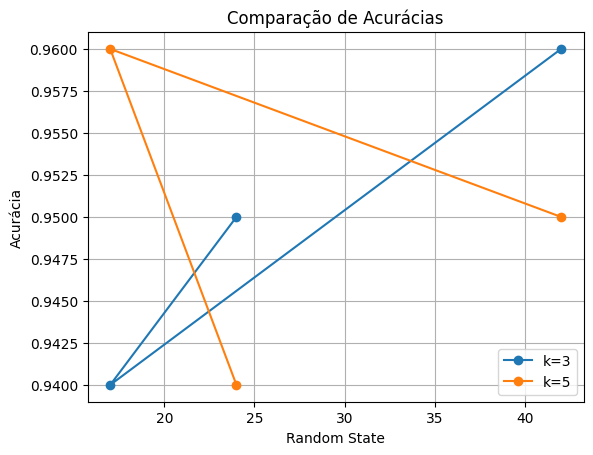

In [10]:
import matplotlib.pyplot as plt

# Dados simulados para visualização (substituir pelos reais)
random_states = [42, 17, 24]
accuracies_k3 = [0.96, 0.94, 0.95]
accuracies_k5 = [0.95, 0.96, 0.94]

plt.plot(random_states, accuracies_k3, label="k=3", marker='o')
plt.plot(random_states, accuracies_k5, label="k=5", marker='o')
plt.title("Comparação de Acurácias")
plt.xlabel("Random State")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()
